# Figures for Corpora Comparison between bioRxiv,  Pubmed Central, New York Times

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from cairosvg import svg2png
from IPython.display import Image
import plotnine as p9

from annorxiver_modules.corpora_comparison_helper import(
    calculate_confidence_intervals,
    create_lemma_count_df,
    plot_bargraph,
    plot_point_bar_figure
)

In [2]:
subset = 20

# KL Divergence Graph

In [3]:
kl_divergence_df = pd.read_csv(
    "output/comparison_stats/corpora_kl_divergence.tsv", 
    sep="\t"
)
kl_divergence_df.head()

,num_terms,KL_divergence,comparison
0,100,0.023430,biorxiv_vs_pmc
1,100,0.473538,biorxiv_vs_nytac
2,100,0.294210,pmc_vs_nytac
3,200,0.037528,biorxiv_vs_pmc
4,200,0.639116,biorxiv_vs_nytac


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/corpora_kl_divergence.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/figures/corpora_kl_divergence.png


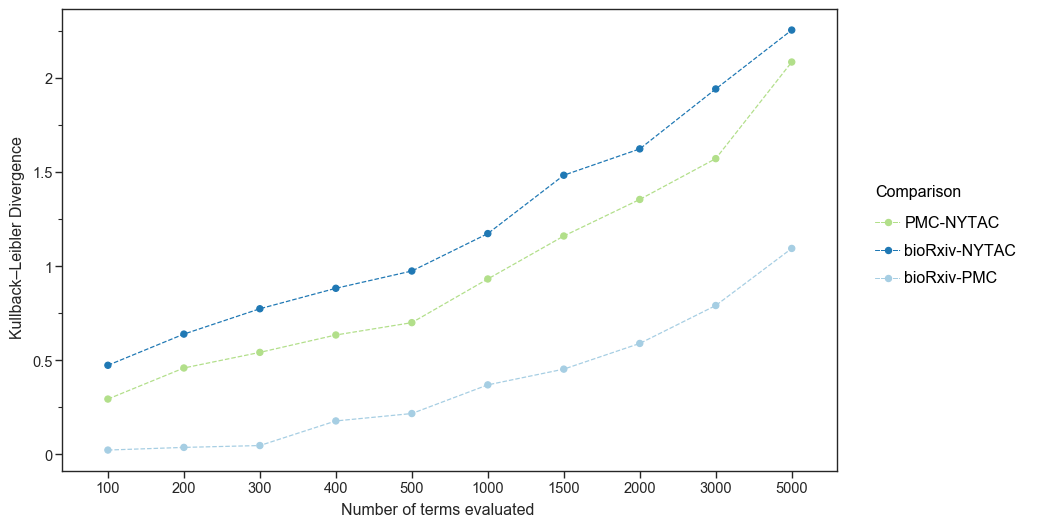

<ggplot: (-9223363248298921493)>


In [4]:
g = (
    p9.ggplot(
        kl_divergence_df
        .replace({
            "biorxiv_vs_pmc": "bioRxiv-PMC",
            "biorxiv_vs_nytac":"bioRxiv-NYTAC",
            "pmc_vs_nytac": "PMC-NYTAC",
        })
        .rename(
            index=str, 
            columns={"comparison": "Comparison"}
        )
    )
    + p9.aes(
        x="factor(num_terms)", y="KL_divergence", 
        fill="Comparison", color="Comparison",
        group = "Comparison"
    )
    + p9.geom_point(size=2)
    + p9.geom_line(linetype='dashed')
    + p9.scale_fill_brewer(
        type='qual', 
        palette='Paired',
        direction=-1
    )
    + p9.scale_color_brewer(
        type='qual', 
        palette='Paired',
        direction=-1,
    )
    + p9.labs(
        x = "Number of terms evaluated",
        y = "Kullback–Leibler Divergence",
    )
    + p9.theme_seaborn(
        context='paper',
        style="ticks",
        font_scale=1.2,
    )
    + p9.theme(
        figure_size=(10, 6),
        text=p9.element_text(family="Arial")
    )
)
g.save("output/svg_files/corpora_kl_divergence.svg")
g.save("output/figures/corpora_kl_divergence.png", dpi=500)
print(g)

# bioRxiv vs Pubmed Central

In [5]:
full_text_comparison = pd.read_csv(
    "output/comparison_stats/biorxiv_vs_pmc_comparison.tsv",
    sep="\t"
)
full_text_comparison.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,’,345652,4837734,262494660,5365015381,41488.085876,1.460319
1,–,211069,7614840,262494660,5365015381,79745.759155,0.566519
2,growth,240308,3933709,262494660,5365015381,10453.263824,1.248580
3,risk,94155,5338328,262494660,5365015381,136800.666016,0.360486
4,rna,280074,3073361,262494660,5365015381,83766.772949,1.862558


## Line Plots

In [6]:
full_plot_df = calculate_confidence_intervals(
    full_text_comparison
)
full_plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds
0,’,345652,4837734,262494660,5365015381,41488.085876,1.460319,1.455285,1.465370
1,–,211069,7614840,262494660,5365015381,79745.759155,0.566519,0.564073,0.568975
2,growth,240308,3933709,262494660,5365015381,10453.263824,1.248580,1.243446,1.253736
3,risk,94155,5338328,262494660,5365015381,136800.666016,0.360486,0.358170,0.362817
4,rna,280074,3073361,262494660,5365015381,83766.772949,1.862558,1.855362,1.869781


In [7]:
plot_df = (
    full_plot_df
    .sort_values("odds_ratio", ascending=False)
    .head(subset)
    .append(
        full_plot_df
        .sort_values("odds_ratio", ascending=False)
        .iloc[:-2]
        .tail(subset)
    )
    .replace('rna', 'RNA')
    .assign(
        odds_ratio=lambda x: x.odds_ratio.apply(lambda x: np.log2(x)),
        lower_odds=lambda x: x.lower_odds.apply(lambda x: np.log2(x)),
        upper_odds=lambda x: x.upper_odds.apply(lambda x: np.log2(x))
    )
)
plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds
74,neurons,245673,1628424,262494660,5365015381,205552.058197,1.624557,1.618434,1.630680
44,genome,310549,2157447,262494660,5365015381,242049.757538,1.556790,1.551360,1.562220
52,genetic,246116,2193087,262494660,5365015381,122719.776398,1.197670,1.191656,1.203683
121,regions,276621,2613208,262494660,5365015381,121417.507721,1.113383,1.107726,1.119040
81,al,1754312,17451861,262494660,5365015381,678998.794312,1.038819,1.036572,1.041065


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_pmc_frequency_odds.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_pmc_frequency_odds.png


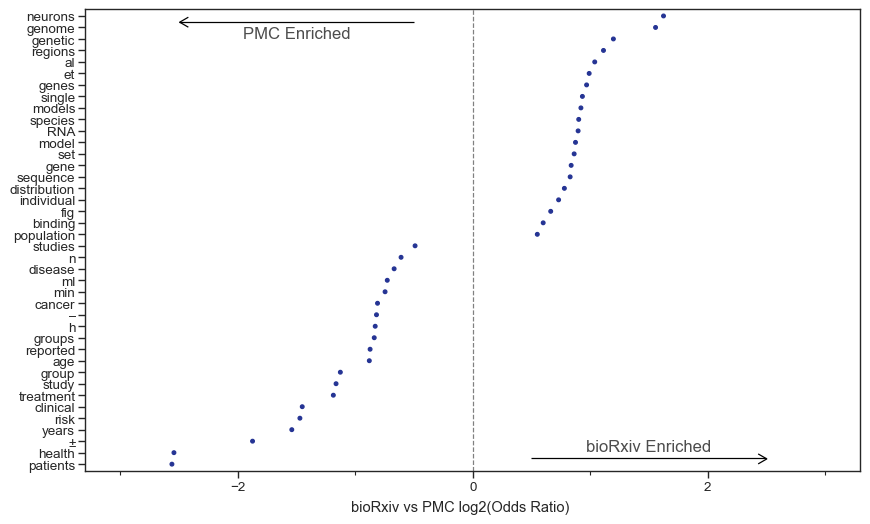

<ggplot: (-9223363248301212086)>


In [8]:
g = (
    p9.ggplot(
        plot_df, 
        p9.aes(
            y="lemma", x="odds_ratio", 
            xmin="lower_odds", xmax="upper_odds"
        )
    )
    + p9.geom_point(
        #position=p9.position_dodge(width=1),
        size=1,
        color="#253494"
    )
    + p9.scale_y_discrete(
        limits=(
            plot_df
            .sort_values("odds_ratio", ascending=True)
            .lemma
            .tolist()
        )
    )
    + p9.scale_x_continuous(
        limits=(-3, 3)
    )
    + p9.geom_vline(
        p9.aes(xintercept=0), 
        linetype = '--', color='grey'
    )
    + p9.annotate(
        "segment", 
        x = 0.5, xend = 2.5, 
        y = 1.5, yend = 1.5, 
        colour = "black", 
        size=0.5, alpha=1,
        arrow=p9.arrow(length=0.1)
    )
    + p9.annotate(
        "text",
        label="bioRxiv Enriched",
        x=1.5, y=2.5,
        size=12,
        alpha=0.7
    )
    + p9.annotate(
        "segment", 
        x = -0.5, xend = -2.5, 
        y = 39.5, yend = 39.5, 
        colour = "black", 
        size=0.5, alpha=1,
        arrow=p9.arrow(length=0.1)
    )
    + p9.annotate(
        "text",
        label="PMC Enriched",
        x=-1.5, y=38.5,
        size=12,
        alpha=0.7
    )
    + p9.theme_seaborn(
        context='paper', 
        style="ticks", 
        font_scale=1.1, 
        font='Arial'
    )
    + p9.theme(
        figure_size=(10, 6),
        panel_grid_minor=p9.element_blank(),
    )
    + p9.labs(
        y=None,
        x="bioRxiv vs PMC log2(Odds Ratio)"
    )
)
g.save("output/svg_files/biorxiv_pmc_frequency_odds.svg")
g.save("output/svg_files/biorxiv_pmc_frequency_odds.png", dpi=75)
print(g)

In [9]:
count_plot_df = (
    create_lemma_count_df(plot_df, 'bioRxiv', 'pmc')
    .replace({"pmc": "PMC"})
    .assign(
        repository = lambda x: pd.Categorical(
            x.repository.tolist(), 
            categories=["bioRxiv", "PMC"]
        )
    )
)
count_plot_df.head()

,lemma,count,repository
0,neurons,245673,bioRxiv
1,genome,310549,bioRxiv
2,genetic,246116,bioRxiv
3,regions,276621,bioRxiv
4,al,1754312,bioRxiv


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_pmc_frequency_bar.svg


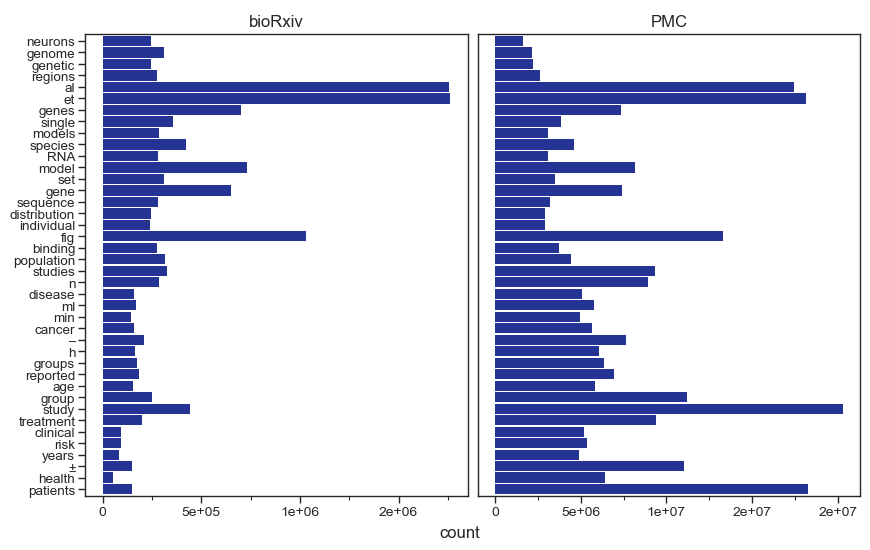

<ggplot: (8788551872446)>


In [10]:
g = plot_bargraph(count_plot_df, plot_df)
g.save("output/svg_files/biorxiv_pmc_frequency_bar.svg")
print(g)

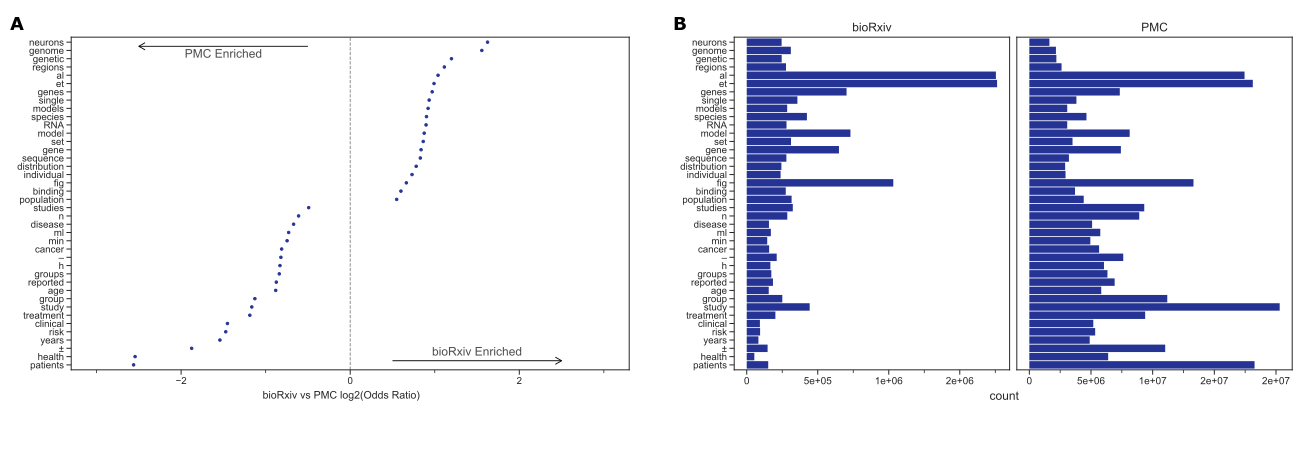

In [11]:
fig_output_path = "output/figures/biorxiv_vs_pubmed_central.png"

fig = plot_point_bar_figure(
    "output/svg_files/biorxiv_pmc_frequency_odds.svg",
    "output/svg_files/biorxiv_pmc_frequency_bar.svg"
)

# save generated SVG files
svg2png(
    bytestring=fig.to_str(), 
    write_to=fig_output_path,
    dpi=75
)

Image(fig_output_path)

# bioRxiv vs Reference

In [12]:
full_text_comparison = pd.read_csv(
    "output/comparison_stats/biorxiv_nytac_comparison.tsv",
    sep="\t"
)
full_text_comparison.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,house,11025,802719,262494660,659277495,448757.653778,0.034496
1,yesterday,65,816741,262494660,659277495,545985.714767,0.000200
2,best,82201,501641,262494660,659277495,68168.151474,0.411559
3,’,345652,1070,262494660,659277495,854209.302498,811.340349
4,net,22817,504167,262494660,659277495,207272.925217,0.113666


## Line Plots

In [13]:
full_plot_df = calculate_confidence_intervals(
    full_text_comparison
)
full_plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds
0,house,11025,802719,262494660,659277495,448757.653778,0.034496,0.033853,0.035150
1,yesterday,65,816741,262494660,659277495,545985.714767,0.000200,0.000157,0.000255
2,best,82201,501641,262494660,659277495,68168.151474,0.411559,0.408534,0.414606
3,’,345652,1070,262494660,659277495,854209.302498,811.340349,764.082557,861.520991
4,net,22817,504167,262494660,659277495,207272.925217,0.113666,0.112168,0.115184


In [14]:
plot_df = (
    full_plot_df
    .sort_values("odds_ratio", ascending=False)
    .head(subset)
    .append(
        full_plot_df
        .sort_values("odds_ratio", ascending=False)
        .iloc[:-2]
        .tail(subset)
    )
    .replace('rna', 'RNA')
    .assign(
        odds_ratio=lambda x: x.odds_ratio.apply(lambda x: np.log2(x)),
        lower_odds=lambda x: x.lower_odds.apply(lambda x: np.log2(x)),
        upper_odds=lambda x: x.upper_odds.apply(lambda x: np.log2(x))
    )
)
plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds
21,°,302552,2,262494660,659277495,7.597517e+05,18.535421,16.535941,20.534901
143,mm,238592,360,262494660,659277495,5.940637e+05,10.700931,10.551786,10.850075
141,fig,1031812,2541,262494660,659277495,2.555250e+06,9.994166,9.938001,10.050331
3,’,345652,1070,262494660,659277495,8.542093e+05,9.664163,9.577585,9.750742
7,RNA,280074,1088,262494660,659277495,6.898414e+05,9.336583,9.250690,9.422477


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_nytac_frequency_odds.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_nytac_frequency_odds.png


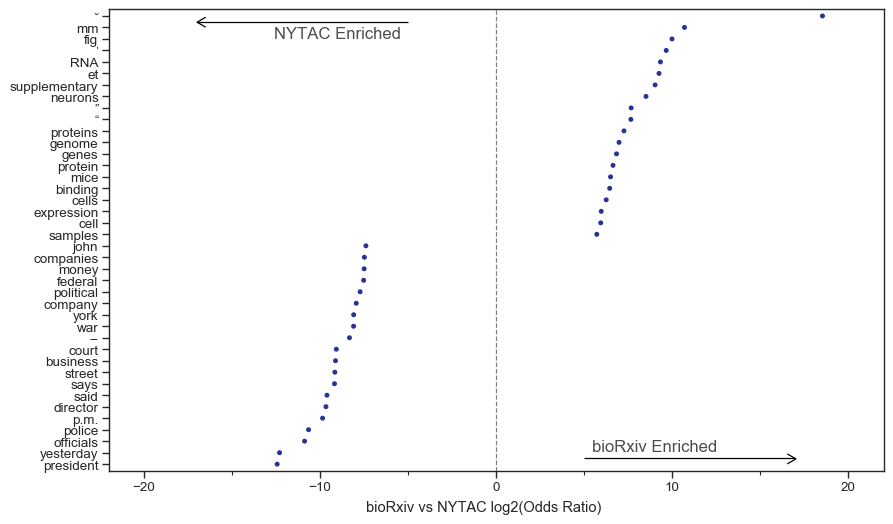

<ggplot: (8788551882658)>


In [15]:
g = (
    p9.ggplot(
        plot_df, 
        p9.aes(
            y="lemma", x="odds_ratio", 
            xmin="lower_odds", xmax="upper_odds"
        )
    )
    + p9.geom_point(
        size=1,
        color="#253494"
    )
    + p9.scale_y_discrete(
        limits=(
            plot_df
            .sort_values("odds_ratio", ascending=True)
            .lemma
            .tolist()
        )
    )
    + p9.scale_x_continuous(
        limits=(-20, 20)
    )
    + p9.geom_vline(
        p9.aes(xintercept=0), 
        linetype = '--', color='grey'
    )
    + p9.annotate(
        "segment", 
        x = 5, xend = 17, 
        y = 1.5, yend = 1.5, 
        colour = "black", 
        size=0.5, alpha=1,
        arrow=p9.arrow(length=0.1)
    )
    + p9.annotate(
        "text",
        label="bioRxiv Enriched",
        x=9, y=2.5,
        size=12,
        alpha=0.7
    )
    + p9.annotate(
        "segment", 
        x = -5, xend = -17, 
        y = 39.5, yend = 39.5, 
        colour = "black", 
        size=0.5, alpha=1,
        arrow=p9.arrow(length=0.1)
    )
    + p9.annotate(
        "text",
        label="NYTAC Enriched",
        x=-9, y=38.5,
        size=12,
        alpha=0.7
    )
    + p9.theme_seaborn(
        context='paper', 
        style="ticks", 
        font_scale=1.1, 
        font='Arial'
    )
    + p9.theme(
        figure_size=(10, 6),
        panel_grid_minor=p9.element_blank(),
    )
    + p9.labs(
        y=None,
        x="bioRxiv vs NYTAC log2(Odds Ratio)"
    )
)

g.save("output/svg_files/biorxiv_nytac_frequency_odds.svg")
g.save("output/svg_files/biorxiv_nytac_frequency_odds.png", dpi=250)
print(g)

In [16]:
count_plot_df = (
    create_lemma_count_df(
        plot_df, 'bioRxiv', 'NYTAC'
    )
    .assign(
        repository = lambda x: pd.Categorical(
            x.repository.tolist(), 
            categories=["bioRxiv", "NYTAC"]
        )
    )
)
count_plot_df.head()

,lemma,count,repository
0,°,302552,bioRxiv
1,mm,238592,bioRxiv
2,fig,1031812,bioRxiv
3,’,345652,bioRxiv
4,RNA,280074,bioRxiv


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_nytac_frequency_bar.svg


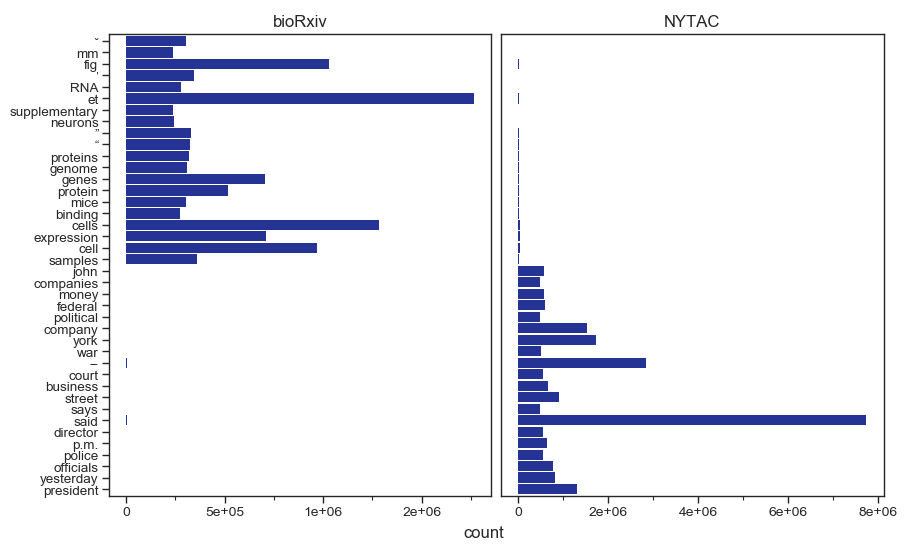

<ggplot: (-9223363248301076522)>


In [17]:
g = plot_bargraph(count_plot_df, plot_df)
g.save("output/svg_files/biorxiv_nytac_frequency_bar.svg")
print(g)

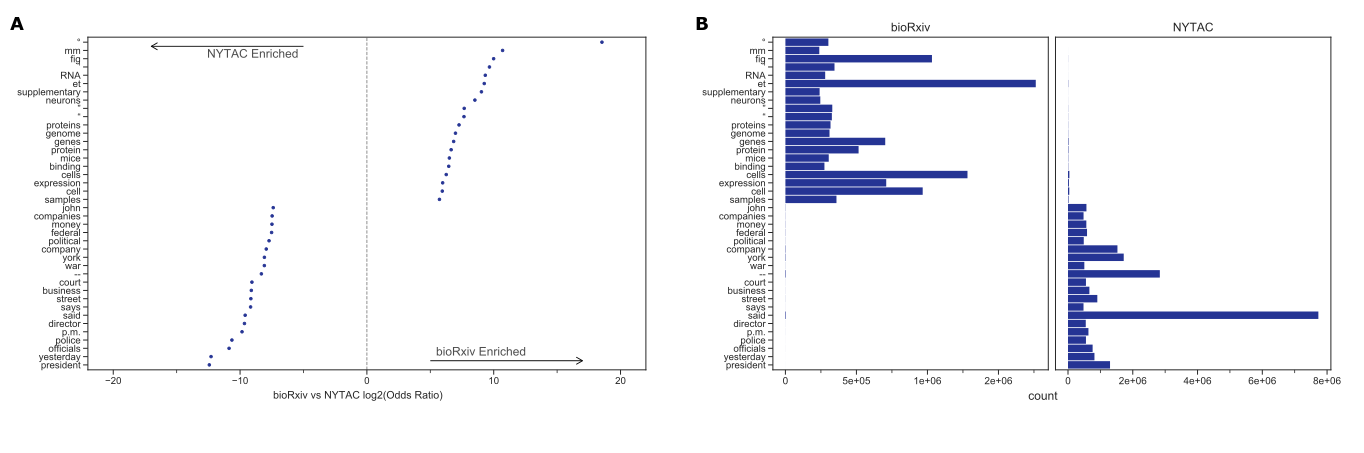

In [18]:
fig_output_path = "output/figures/biorxiv_vs_reference.png"

fig = plot_point_bar_figure(
    "output/svg_files/biorxiv_nytac_frequency_odds.svg",
    "output/svg_files/biorxiv_nytac_frequency_bar.svg"
)

# save generated SVG files
svg2png(
    bytestring=fig.to_str(), 
    write_to=fig_output_path,
    dpi=75
)

Image(fig_output_path)

# PMC vs Reference

In [19]:
full_text_comparison = pd.read_csv(
    "output/comparison_stats/pmc_nytac_comparison.tsv",
    sep="\t"
)
full_text_comparison.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,house,236735,802719,5365015381,659277495,2.490533e+06,0.036241
1,yesterday,3190,816741,5365015381,659277495,3.572001e+06,0.000480
2,best,1323985,501641,5365015381,659277495,3.796544e+05,0.324330
3,’,4837734,1070,5365015381,659277495,1.105503e+06,555.591365
4,–,7614840,1,5365015381,659277495,1.763922e+06,935746.178437


## Line Plots

In [20]:
full_plot_df = calculate_confidence_intervals(
    full_text_comparison
)
full_plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds
0,house,236735,802719,5365015381,659277495,2.490533e+06,0.036241,0.036075,3.640720e-02
1,yesterday,3190,816741,5365015381,659277495,3.572001e+06,0.000480,0.000464,4.969402e-04
2,best,1323985,501641,5365015381,659277495,3.796544e+05,0.324330,0.323278,3.253861e-01
3,’,4837734,1070,5365015381,659277495,1.105503e+06,555.591365,523.275158,5.899033e+02
4,–,7614840,1,5365015381,659277495,1.763922e+06,935746.178437,131807.711894,6.643169e+06


In [21]:
plot_df = (
    full_plot_df
    .sort_values("odds_ratio", ascending=False)
    .drop([152, 160])
    .head(subset)
    .append(
        full_plot_df
        .sort_values("odds_ratio", ascending=False)
        .iloc[:-2]
        .tail(subset)
    )
    .replace('rna', 'RNA')
    .assign(
        odds_ratio=lambda x: x.odds_ratio.apply(lambda x: np.log2(x)),
        lower_odds=lambda x: x.lower_odds.apply(lambda x: np.log2(x)),
        upper_odds=lambda x: x.upper_odds.apply(lambda x: np.log2(x))
    )
)
plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds
117,±,11016756,1,5365015381,659277495,2.551201e+06,20.368572,17.540889,23.196254
4,–,7614840,1,5365015381,659277495,1.763922e+06,19.835758,17.008075,22.663440
19,°,8136102,2,5365015381,659277495,1.884558e+06,18.931282,16.931808,20.930755
70,ml,5753367,182,5365015381,659277495,1.329636e+06,11.923556,11.713951,12.133161
142,mm,5761790,360,5365015381,659277495,1.328820e+06,10.941608,10.792571,11.090645


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/pmc_nytac_frequency_odds.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/pmc_nytac_frequency_odds.png
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/l

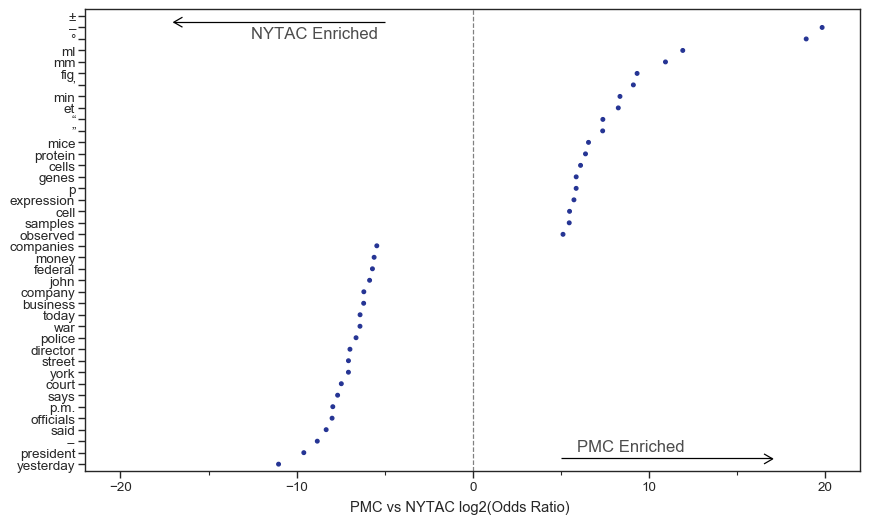

<ggplot: (8788551321762)>


In [22]:
g = (
    p9.ggplot(
        plot_df, 
        p9.aes(
            y="lemma", x="odds_ratio", 
            xmin="lower_odds", xmax="upper_odds"
        )
    )
    + p9.geom_point(
        size=1,
        color="#253494"
    )
    + p9.scale_y_discrete(
        limits=(
            plot_df
            .sort_values("odds_ratio", ascending=True)
            .lemma
            .tolist()
        )
    )
    + p9.scale_x_continuous(
        limits=(-20, 20)
    )
    + p9.geom_vline(
        p9.aes(xintercept=0), 
        linetype = '--', color='grey'
    )
    + p9.annotate(
        "segment", 
        x = 5, xend = 17, 
        y = 1.5, yend = 1.5, 
        colour = "black", 
        size=0.5, alpha=1,
        arrow=p9.arrow(length=0.1)
    )
    + p9.annotate(
        "text",
        label="PMC Enriched",
        x=9, y=2.5,
        size=12,
        alpha=0.7
    )
    + p9.annotate(
        "segment", 
        x = -5, xend = -17, 
        y = 39.5, yend = 39.5, 
        colour = "black", 
        size=0.5, alpha=1,
        arrow=p9.arrow(length=0.1)
    )
    + p9.annotate(
        "text",
        label="NYTAC Enriched",
        x=-9, y=38.5,
        size=12,
        alpha=0.7
    )
    + p9.theme_seaborn(
        context='paper', 
        style="ticks", 
        font_scale=1.1, 
        font='Arial'
    )
    + p9.theme(
        figure_size=(10, 6),
        panel_grid_minor=p9.element_blank(),
    )
    + p9.labs(
        y=None,
        x="PMC vs NYTAC log2(Odds Ratio)"
    )
)
g.save("output/svg_files/pmc_nytac_frequency_odds.svg")
g.save("output/svg_files/pmc_nytac_frequency_odds.png", dpi=250)
print(g)

In [23]:
count_plot_df = (
    create_lemma_count_df(
        plot_df, 'pmc', 'reference'
    )
    .replace({
        "pmc":"PMC",
        "reference":"NYTAC"
    })
)
count_plot_df.head()

,lemma,count,repository
0,±,11016756,PMC
1,–,7614840,PMC
2,°,8136102,PMC
3,ml,5753367,PMC
4,mm,5761790,PMC


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/pmc_nytac_frequency_bar.svg


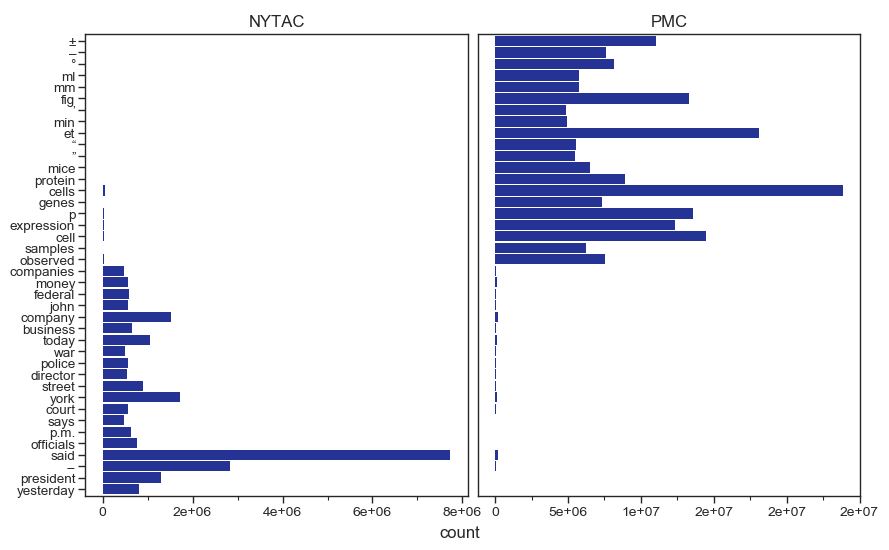

<ggplot: (-9223363248303016560)>


In [24]:
g = plot_bargraph(count_plot_df, plot_df)
g.save("output/svg_files/pmc_nytac_frequency_bar.svg", dpi=75)
print(g)

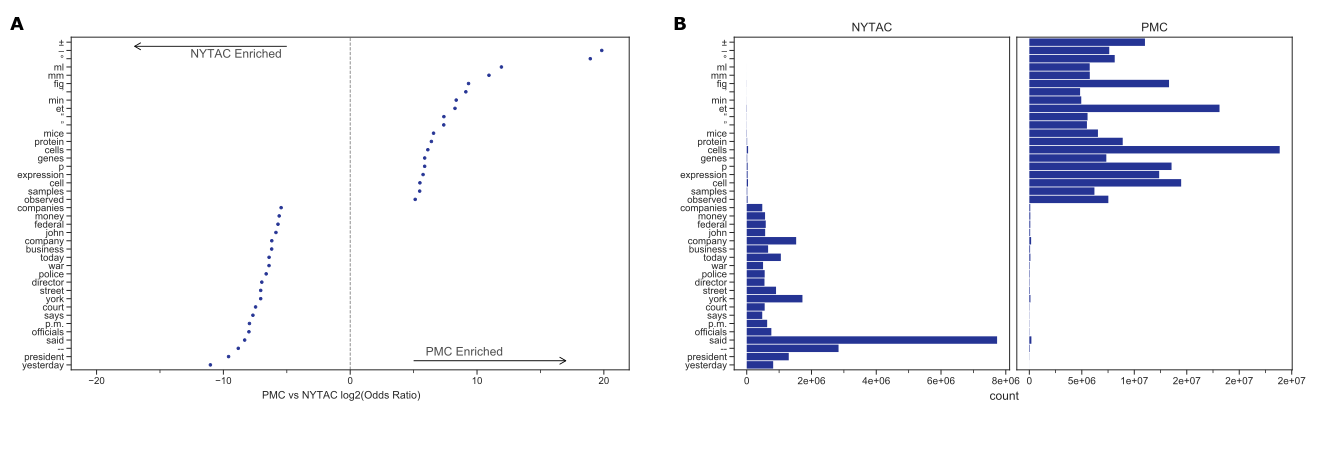

In [25]:
fig_output_path = "output/figures/pmc_vs_reference.png"

fig = plot_point_bar_figure(
    "output/svg_files/pmc_nytac_frequency_odds.svg",
    "output/svg_files/pmc_nytac_frequency_bar.svg"
)

# save generated SVG files
svg2png(
    bytestring=fig.to_str(), 
    write_to=fig_output_path,
    dpi=75
)

Image(fig_output_path)

# Preprint vs Published

In [26]:
preprint_published_comparison = pd.read_csv(
    "output/comparison_stats/preprint_to_published_comparison.tsv", 
    sep="\t"
)
preprint_published_comparison.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,n,92167,127120,89908910,81373377,9614.587584,0.656207
1,5,157973,134581,89908910,81373377,266.008088,1.062377
2,table,135000,130113,89908910,81373377,261.397415,0.939059
3,found,137176,116133,89908910,81373377,280.514612,1.069060
4,methods,120787,104507,89908910,81373377,113.553738,1.046055


## Line Plot

In [27]:
full_plot_df = calculate_confidence_intervals(
    preprint_published_comparison
)
full_plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds
0,n,92167,127120,89908910,81373377,9614.587584,0.656207,0.650663,0.661799
1,5,157973,134581,89908910,81373377,266.008088,1.062377,1.054674,1.070136
2,table,135000,130113,89908910,81373377,261.397415,0.939059,0.931930,0.946242
3,found,137176,116133,89908910,81373377,280.514612,1.069060,1.060731,1.077454
4,methods,120787,104507,89908910,81373377,113.553738,1.046055,1.037423,1.054758


In [28]:
plot_df = (
    full_plot_df
    .sort_values("odds_ratio", ascending=False)
    .head(subset)
    .append(
        full_plot_df
        .sort_values("odds_ratio", ascending=False)
        .iloc[:-3]
        .tail(subset)
    )
    .assign(
        odds_ratio=lambda x: x.odds_ratio.apply(lambda x: np.log2(x)),
        lower_odds=lambda x: x.lower_odds.apply(lambda x: np.log2(x)),
        upper_odds=lambda x: x.upper_odds.apply(lambda x: np.log2(x))
    )
)
plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds
55,’,119331,87400,89908910,81373377,2277.964025,0.305356,0.292760,0.317953
99,al,588656,432210,89908910,81373377,10937.970082,0.301785,0.296104,0.307466
77,genetic,93449,68617,89908910,81373377,1744.185575,0.301706,0.287483,0.315928
84,non,126616,93432,89908910,81373377,2257.585392,0.294564,0.282361,0.306767
57,et,592718,440719,89908910,81373377,9786.558330,0.283580,0.277939,0.289220


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/preprint_published_frequency_odds.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/preprint_published_frequency_odds.png


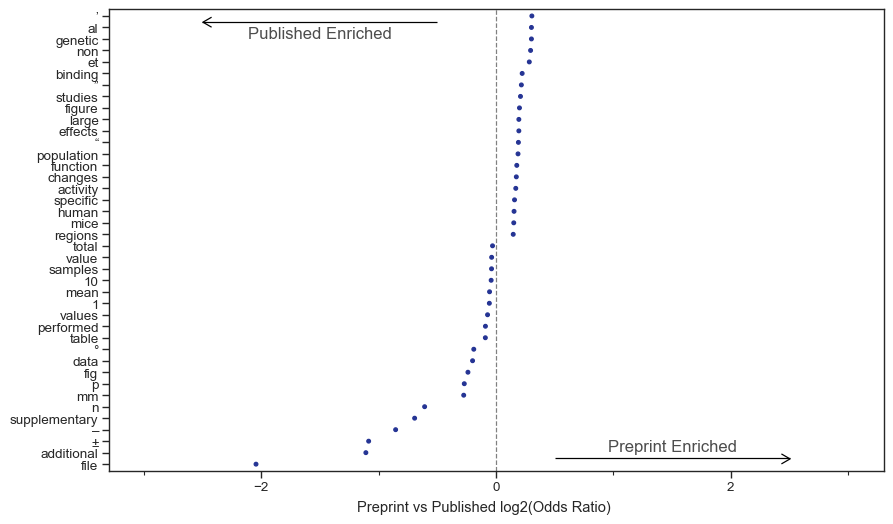

<ggplot: (-9223363248301208348)>


In [29]:
g = (
    p9.ggplot(
        plot_df, 
        p9.aes(
            y="lemma", x="odds_ratio", 
            xmin="lower_odds", xmax="upper_odds"
        )
    )
    + p9.geom_point(
        #position=p9.position_dodge(width=1),
        size=1,
        color="#253494"
    )
    + p9.scale_y_discrete(
        limits=(
            plot_df
            .sort_values("odds_ratio", ascending=True)
            .lemma
            .tolist()
        )
    )
    + p9.scale_x_continuous(
        limits=(-3, 3)
    )
    + p9.geom_vline(
        p9.aes(xintercept=0), 
        linetype = '--', color='grey'
    )
    + p9.annotate(
        "segment", 
        x = 0.5, xend = 2.5, 
        y = 1.5, yend = 1.5, 
        colour = "black", 
        size=0.5, alpha=1,
        arrow=p9.arrow(length=0.1)
    )
    + p9.annotate(
        "text",
        label="Preprint Enriched",
        x=1.5, y=2.5,
        size=12,
        alpha=0.7
    )
    + p9.annotate(
        "segment", 
        x = -0.5, xend = -2.5, 
        y = 39.5, yend = 39.5, 
        colour = "black", 
        size=0.5, alpha=1,
        arrow=p9.arrow(length=0.1)
    )
    + p9.annotate(
        "text",
        label="Published Enriched",
        x=-1.5, y=38.5,
        size=12,
        alpha=0.7
    )
    + p9.theme_seaborn(
        context='paper', 
        style="ticks", 
        font_scale=1.1, 
        font='Arial'
    )
    + p9.theme(
        figure_size=(10, 6),
        panel_grid_minor=p9.element_blank(),
    )
    + p9.labs(
        y=None,
        x="Preprint vs Published log2(Odds Ratio)"
    )
)
g.save("output/svg_files/preprint_published_frequency_odds.svg")
g.save("output/svg_files/preprint_published_frequency_odds.png", dpi=250)
print(g)

In [30]:
count_plot_df = (
    create_lemma_count_df(
        plot_df, 'preprint', 'published'
    )
    .replace({"preprint":"Preprint", "published":"Published"})
)
count_plot_df.head()

,lemma,count,repository
0,’,119331,Preprint
1,al,588656,Preprint
2,genetic,93449,Preprint
3,non,126616,Preprint
4,et,592718,Preprint


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/preprint_published_frequency_bar.svg


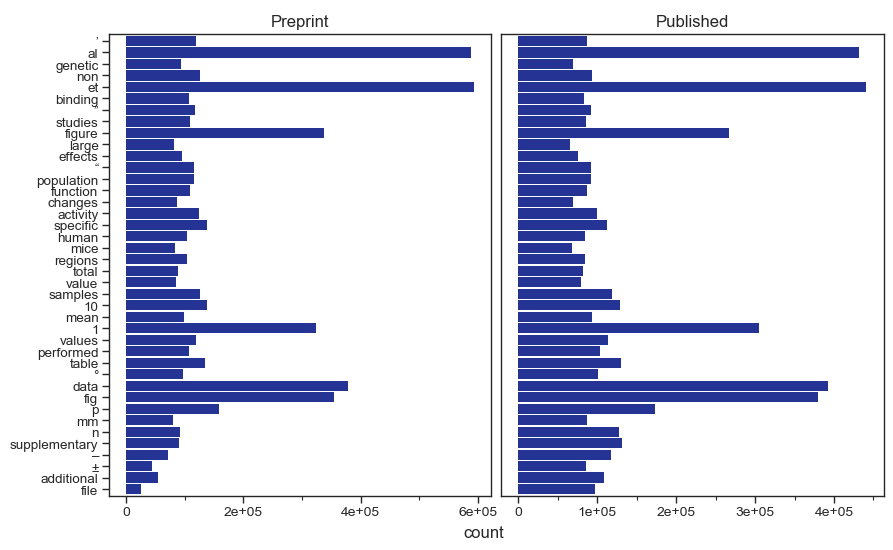

<ggplot: (8788551710479)>


In [31]:
g = plot_bargraph(count_plot_df, plot_df)
g.save("output/svg_files/preprint_published_frequency_bar.svg", dpi=75)
print(g)

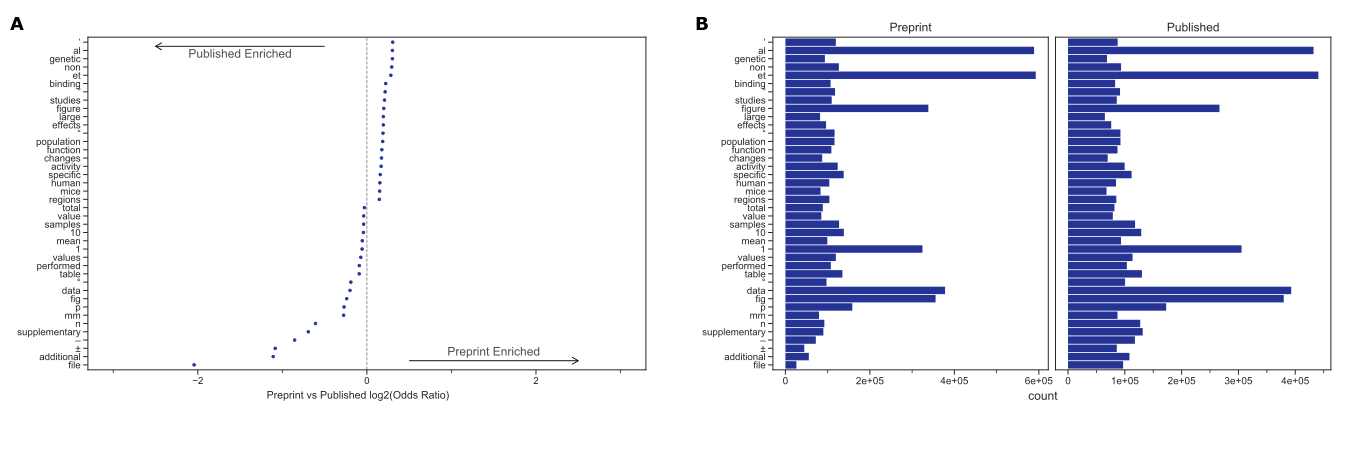

In [32]:
fig_output_path = "output/figures/preprint_published_comparison.png"

fig = plot_point_bar_figure(
    "output/svg_files/preprint_published_frequency_odds.svg",
    "output/svg_files/preprint_published_frequency_bar.svg"
)

# save generated SVG files
svg2png(
    bytestring=fig.to_str(), 
    write_to=fig_output_path,
    dpi=75
)

Image(fig_output_path)